## Seattle Terry Stops Final Project Submission

Please fill out:
* Student name: Rebecca Mih
* Student pace:part time online
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL: 
* Data Source:  
* Date of last update to the datasource: April 15, 2020
* Key references:
* https://assets.documentcloud.org/documents/6136893/SPDs-2019-Annual-Report-on-Stops-and-Detentions.pdf



<div>
<img src= "Terry Stops Sagepub.com.png"
           width=500"/>
</div


## The Audience

Since 1967 landmark ruling Terry v. Ohio 

o identify opportunities

   * P

## Objectives

* Understand whether a Terry Stop has occurred based on  
    - Location
    - Race of officer
    - Race of detainee
    - Gender of officer
    - Gender of detainee
    - Age of officer
    - Age of detainee
    
* Understand whether a Terry Stop has successfully deterred crime based on the above

## Definition of features provided
#
Column Names and descriptions

* **Subject Age Group**	
Subject Age Group (10 year increments) as reported by the officer.


* **Subject ID**	
Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.


* **GO / SC Num**
General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.


* **Terry Stop ID**
Key identifying unique Terry Stop reports.


* **Stop Resolution**
Resolution of the stop as reported by the officer.


* **Weapon Type**	
Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.


* **Officer ID**	
Key identifying unique officers in the dataset.


* **Officer YOB*	
Year of birth, as reported by the officer.


* **Officer Gender**	
Gender of the officer, as reported by the officer.


* **Officer Race**	
Race of the officer, as reported by the officer.


* **Subject Perceived Race**	
Perceived race of the subject, as reported by the officer.


* **Subject Perceived Gender**	
Perceived gender of the subject, as reported by the officer.

* **Reported Date**	
Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.

* **Reported Time**	
Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.


* **Initial Call Type**	
Initial classification of the call as assigned by 911.

* **Final Call Type*	
Final classification of the call as assigned by the primary officer closing the event.


* **Call Type**	
How the call was received by the communication center.


* **Officer Squad**	
Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).

* **Arrest Flag**	
Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).


* **Frisk Flag**	
Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.


* **Precinct**	
Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
* **Sector**	
Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.


* **Beat**	
Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import sklearn
import math
pd.options.display.float_format = '{:.1f}'.format
%matplotlib inline
seattle_df = pd.read_csv('Terry_Stops.csv', dtype=

C:\Users\zachmih\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##  Analysis Workflow

### 1. Pre-processing the data 

1. Check data size, NaNs, and # of non-null values which are not valid data 
2. Clean up missing values by imputing values or dropping
3. Replace ? or other non-valid data by imputing values or dropping data
4. Check for duplicates and remove if appropriate
5. Change datatypes of columns as appropriate


### 2. Perform visualizations and re-shape/transform data
1. Use .describe() and .hist() histograms
    * 1a. Identify outliers (based on auto-scaling of plots)
    * 1b. Note which features are continuous and which are categorical
   
   
2. Perform Geo-spatial visualizations to help the audience understand the data scope


3. Perform 3D scatter plots visualizations on key features that stakeholders typically care about
    * 3a. Square foot living space
    * 3b. Age of house (year built)
    * 3c. Price
    * 3d. Price per Square Foot
   
   
4. Analyse the target (Sales Price)  using statistical analysis, .groupby() and .describe() and visualizations (boxplots)
    * 4a. Review the geo-spatial distribution of the data to understand whether grouped differences are meaningful
    * 4b. Perform additional univariate splits based on categorical data to see if additional data cleaning is needed
    * 4c. Outlier calculations and decision to drop or not
    * 4d. Decide whether to filter (based on analysis results) or not
   
   
5. Look at feature correlations (Pearson correlation) for those that may be co-linear


6. If feature scaling and normalization is needed (with linear regression it can improve kurtosis and skew
    * 6a. Transform non-categorical data to categoricals and perform one-hot encoding
    * 6b. Perform log transformations on continuous variables (if applicable)
    * 6c. Normalize continuous variables

### 3. Create a Multi-Linear Regression Model



1. Split into train and test data  (Treated as optional here)
2. Run the model
3. Review quality indicators for the model:  p-values, skew, kurtosis (deviation from normal) and # of datapoints ( to look for co-linearity )
4. Revise data inputs if needed to improve quality indicators 
    - by adding created features, and removing colinear features
    - by removing outliers through filters
    - through use of subject matter knowledge

### 4. Write the Report
1. Explain key business findings and recommended next steps




### 1. Pre-processing the data 

1. Check data size, NaNs, and # of non-null values which are not valid data 
2. Clean up missing values by imputing values or dropping
3. Replace ? or other non-valid data by imputing values or dropping data
4. Check for duplicates and remove if appropriate
5. Change datatypes of columns as appropriate

In [5]:
seattle_df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000000000.0,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000000000.0,32260,Field Contact,None,7539,1963,M,White,...,4:55:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000000000.0,46430,Field Contact,None,7591,1985,M,Hispanic or Latino,...,1:06:00,-,-,-,WEST PCT 3RD W - MARY,N,N,-,-,-
3,-,-1,20150000000000.0,51725,Field Contact,None,7456,1979,M,White,...,19:27:00,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,-,-
4,-,-1,20150000000000.0,51727,Field Contact,None,7456,1979,M,White,...,19:32:00,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,-,-


In [2]:
seattle_df.shape

# The rationale for this is to understand how big the dataset is,  how many features are contained in the data
# This helps with planning for function vs lambda functions,  and whether certain kinds of visualizations will be feasible
# for the analysis (with my computer hardware).  With compute limitations, types of correlation plots cause the kernal to die,
# if there are more than 11 features.

(41104, 23)

# seattle_df.isna().sum()
# Handy alternate checks if needed
#df.isna().any()
#df.isnull().any()
#df.shape

## Findings from isna().sum()
### isna().sum() determines how many data are missing from a given feature

* waterfront, view and yr_renovated have missing data


In [4]:
seattle_df.isna().sum()


Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               535
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

## Findings from info():

## info() helps you determine if there missing values or datatypes that need to be modified

1. columns missing values: waterfront, view, yr_renovated

2. Objects (Strings):  date, sqft_basement
     
     Convert sqft_basement into a int


3. Categoricals (currently floats):  waterfront, view
   
   Categoricals (currently ints):  condition, grade 


4. Need Clarification:  sqft_living15,  sqft_lot15



In [7]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41104 entries, 0 to 41103
Data columns (total 23 columns):
Subject Age Group           41104 non-null object
Subject ID                  41104 non-null int64
GO / SC Num                 41104 non-null float64
Terry Stop ID               41104 non-null int64
Stop Resolution             41104 non-null object
Weapon Type                 41104 non-null object
Officer ID                  41104 non-null object
Officer YOB                 41104 non-null int64
Officer Gender              41104 non-null object
Officer Race                41104 non-null object
Subject Perceived Race      41104 non-null object
Subject Perceived Gender    41104 non-null object
Reported Date               41104 non-null object
Reported Time               41104 non-null object
Initial Call Type           41104 non-null object
Final Call Type             41104 non-null object
Call Type                   41104 non-null object
Officer Squad               40569 non-null 

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,41104.0,41104.0,41104.0,41104.0
mean,1365732753.2,20172094929933.8,1721114746.7,1982.4
std,3224045347.8,15083242720.6,4000252929.3,8.8
min,-1.0,20090000000000.0,28020.0,1900.0
25%,-1.0,20160000000000.0,159639.2,1978.0
50%,-1.0,20170000000000.0,329088.0,1985.0
75%,-1.0,20180000000000.0,514068.8,1989.0
max,12990193109.0,20200000000000.0,12990590952.0,1997.0


## Findings from  .describe() 
## describe() can help determine which features are categoricals

* Categorical data often has min, 25%, 50% or 75% values at 0.
* Examples here are 'waterfront', 'view', and 'yr_renovated'


## describe() can help determine if there are outliers in the target or features

* For example, the price maximum shows houses selling for $7.7M which is more than 20 standard deviations above the mean

## Check for duplicate rows and sum them up


In [9]:
seattle_df.duplicated().sum()

0

##  Look for extraneous values using value_counts()
1. Rationale:  This analysis is useful for flushing out missing values in the form
of question marks, or dummy variables
2.  It also gives a preliminary view of the distributions in the data, albeit by numbers rather than graphics


In [10]:
for col in seattle_df.columns:
    print(col, '\n', seattle_df[col].value_counts().head(), '\n')

Subject Age Group 
 26 - 35         13615
36 - 45          8547
18 - 25          8509
46 - 55          5274
56 and Above     1996
Name: Subject Age Group, dtype: int64 

Subject ID 
 -1             34637
 7726859935       15
 7727117712        9
 7753260438        9
 7726974515        6
Name: Subject ID, dtype: int64 

GO / SC Num 
 20180000000000.0    8881
20190000000000.0    7906
20160000000000.0    7721
20170000000000.0    7480
20150000000000.0    7061
Name: GO / SC Num, dtype: int64 

Terry Stop ID 
 12608907801    2
8677596250     2
12119304761    2
12105013403    2
12851512661    2
Name: Terry Stop ID, dtype: int64 

Stop Resolution 
 Field Contact               16287
Offense Report              13976
Arrest                       9957
Referred for Prosecution      728
Citation / Infraction         156
Name: Stop Resolution, dtype: int64 

Weapon Type 
 None                                 32565
-                                     6213
Lethal Cutting Instrument             1482


##  Findings from value_counts():

## value_counts()  is a way to discover non-null invalid data and non-unique data

1. For example, sqft_basement has a lot of ? entries which are non-null, invalid data

2. The bathroom data is odd -- there are odd numbers of bathrooms,  like, 2.2 or 1.8, which makes little sense

3. Discovery of non-unique data.  In principle, each house id should be unique. However, it appears that houses appear more than 2 times in the listing (in one case, 3 times).  Since these are not duplicates,  it would merit a little further looking at the sales prices.  Print out the duplicated rows to get an idea of what these properties look like

## value_counts() also gives a quick idea of the distribution of the data 

* Because the counts for each unique value of the feature are sorted in descending order (highest number of counts first), it can give you an idea of the data distribution for a given feature


In [9]:
# Find out how many non-unique ids there are in the data
len(seattle_df.id) - seattle_df.id.nunique()

177

In [10]:
# Check for duplicates
duplicates = seattle_df[seattle_df.duplicated(subset =['id'], keep = False)]
duplicates.sort_values(by=['id']).head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.0,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3,-122.2,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.0,2400,9373,2.0,nan,0.0,...,7,2400,0.0,1991,0.0,98002,47.3,-122.2,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.0,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.5,-122.2,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.0,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,nan,98055,47.5,-122.2,1480,6969
11422,109200390,10/20/2014,250000.0,3,1.8,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.3,-122.4,1830,6956


## Finding from duplicated():

## No rows are completed duplicated;  however, some properties were sold more than once, between May 2014-May 2015

- Some houses were re-listed and sold, within the year, as shown in the table above
- So their id number was duplicated,  but other columns like 'date' and 'price' were unique.

- Further analysis could be done -- to see how much was gained between sales (suggesting house-flipping, if money was made) and whether there were changes to the listing, such as more rooms, more living space etc.

- However, the number of properties with multiple sales in 1 year are pretty few (~87 properties),  that I'm going to leave all the data in the dataset for now.  The data could represent the increase in time, for the same house.

- If we were to "clean up" these rows,  then most likely I would remove earlier sales data, keeping only the latest.


## Next Steps - Clean up:

    * 1. Update the Missing data in waterfront, view, yr_renovated
    * 2. ? in sqft_basement
    * 3. Convert sqft_basement to float or int
    * 4. Update / impute values for bathrooms


In [11]:
# Not shown analysis:  I imputed dummy 1.5 into a test df, then test.groupby(['view'])['price'].describe()
# In all 3 cases,  the dummy "1.5" distribution looks like the "0.0"  distribution,  so go ahead and group together

seattle_df.waterfront.fillna(value = 0.0, inplace = True)
seattle_df.view.fillna(value = 0.0, inplace = True)
seattle_df.yr_renovated.fillna(value = 0.0, inplace = True)

# Confirm that the missing values have been replaced
seattle_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Clean the 'sqft_basement' column of data

1. Convert the 'sqft_basement' columns data to strings 
2. Use string methods to remove the '?' and the '.0' endings
3. Then convert the data into integers

In [12]:
seattle_df.to_string(columns = ['sqft_basement'])
seattle_df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [13]:
# Pandas String Replacement to remove the ".0" from each value in order to make these integers
# Reference https://www.geeksforgeeks.org/python-pandas-series-str-slice/
#seattle_df['sqft_basement'] = seattle_df['sqft_basement'].astype(str)
seattle_df.sqft_basement.replace(to_replace = '?', value = 0.0, inplace = True)
seattle_df.sqft_basement.replace(to_replace = '0.0', value = 0.0, inplace = True)
seattle_df.sqft_basement = seattle_df.sqft_basement.astype(str)
seattle_df.sqft_basement.value_counts().head()
start, stop, step = 0, -2, 1
seattle_df['sqft_basement'] = seattle_df['sqft_basement'].str.slice(start, stop, step)
seattle_df.sqft_basement.value_counts().head()

0      13280
600      217
500      209
700      208
800      201
Name: sqft_basement, dtype: int64

In [14]:
# Now change all the values in sqft_basement into integers
seattle_df.sqft_basement = seattle_df.sqft_basement.astype(int)

In [15]:
# Check to see if there are discrepancies between the sqft living and the sum of sqft_above + sqft_basement
seattle_df['sqft_check'] = seattle_df['sqft_above'] + seattle_df['sqft_basement']

seattle_df['sqft_check'].dtypes
print((seattle_df['sqft_check'] == seattle_df['sqft_living']).value_counts())

True     21427
False      170
dtype: int64


In [16]:
# check if there are any errors in calculating sqft_living from sqft_above + sqft_basement
bigger = 0
smaller= 0

for footage in range(0, len(seattle_df)):
    if seattle_df['sqft_check'][footage] != seattle_df['sqft_living'][footage]:        
        if seattle_df.sqft_living[footage] > seattle_df.sqft_check[footage]:
                bigger += 1
        else:
                smaller +=1
                
print(" Sqft_living was bigger than calculated value {} number of times".format(bigger))
print(" Sqft_living was smaller than calculated value {} number of times".format(smaller))

#  Question:  Is there a way to do this without creating another column in the df that I then have to drop

 Sqft_living was bigger than calculated value 170 number of times
 Sqft_living was smaller than calculated value 0 number of times


In [17]:
seattle_df.drop(columns = ['sqft_check', 'id', 'date'], inplace=True)
#seattle_df.columns

## Conclusion:  Sqft_living is always bigger than sqft_above + sqft_basement

    * Recommendation:  use Sqft_living and sqft_basement as features to be fed to the model only,  since sqft_above is an extra value.

In [18]:
# Create a new column (feature) for price per square foot. 
seattle_df['ppsf'] = seattle_df['price'] / seattle_df['sqft_living']

#seattle_df.head()

## Look at other features for outliers using scatter plots versus price

* We've cleaned up the missing data and ? kinds of data.
* However,  there may still be typos or other messy data which are outliers, which should be cleaned up

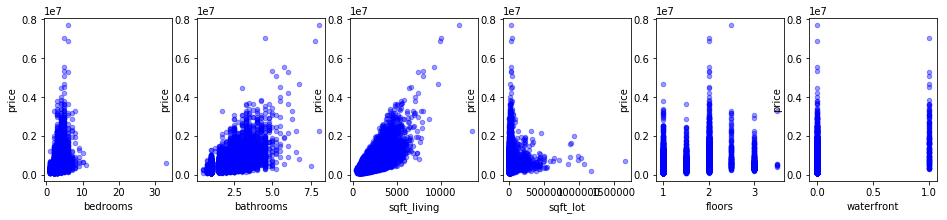

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(list(seattle_df)[1:7], axes):
                    seattle_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha = 0.4, color = 'b');

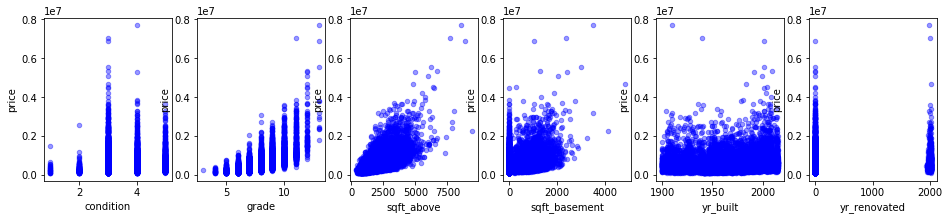

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(list(seattle_df)[8:14], axes):
                    seattle_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha = 0.4, color = 'b');

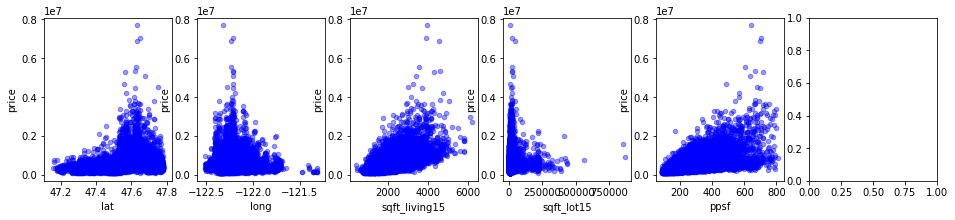

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(list(seattle_df)[15:22], axes):
                    seattle_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha = 0.4, color = 'b');

## Autoscaling allows to see clearly there is an outlier in one house that has 33 bedroms.

### Bathrooms looks continuous when it probabaly ought be a categorical.  There were odd numbers of bathrooms  (1.2, 1.8) seen in the data

### There may be outliers in sqft_living,  sqft_lot,  sqft_lot15

In [22]:

seattle_df.sort_values(by=['bedrooms'], ascending = False).head(1)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ppsf
15856,640000.0,33,1.8,1620,6000,1.0,0.0,0.0,5,7,1040,580,1947,0.0,98103,47.7,-122.3,1330,4700,395.1


In [23]:
# It looks like the house with 33 bedrooms, is probably an outlier as the bedrooms
# inconsistent with the sqft_living and bathrooms and price
# Assume that the "33"  is a typo and should have been "3" Bedrooms - impute 3 for 33
seattle_df['bedrooms'].replace(to_replace = 33, value = 3, inplace = True)


In [24]:
seattle_df.groupby('bathrooms')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
bathrooms,,,,,,,,
0.5,4.0,237375.0,88888.9,109000.0,218500.0,264000.0,282875.0,312500.0
0.8,71.0,294936.6,139022.0,80000.0,201000.0,275000.0,355000.0,785000.0
1.0,3851.0,347072.1,154567.4,78000.0,230000.0,320000.0,425000.0,1300000.0
1.2,9.0,621772.2,408881.7,275000.0,360000.0,516500.0,545000.0,1390000.0
1.5,1445.0,409429.7,193930.7,107000.0,265950.0,370000.0,495800.0,1500000.0
1.8,3048.0,454915.8,202049.2,115000.0,310000.0,422900.0,555000.0,3280000.0
2.0,1930.0,457905.0,206072.3,115000.0,300500.0,423250.0,563000.0,2200000.0
2.2,2047.0,533768.8,281159.7,160000.0,339975.0,472500.0,625000.0,2400000.0
2.5,5377.0,553803.3,267071.2,153503.0,365000.0,499950.0,675000.0,3070000.0


In [25]:
# It seems that it's potentially ok
# King County may count "quarter baths" as well as "half baths", which could account for the unusual bath numbers
# Based on the distribution,  probably the number of baths should be treated as a categorical

In [26]:

seattle_df.sqft_lot.describe()

count     21597.0
mean      15099.4
std       41412.6
min         520.0
25%        5040.0
50%        7618.0
75%       10685.0
max     1651359.0
Name: sqft_lot, dtype: float64

C:\Users\zachmih\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


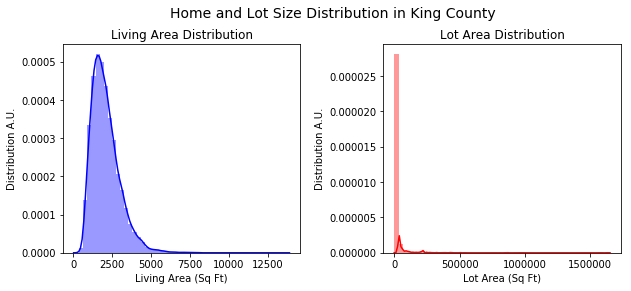

In [27]:
# Plot price and price per square foot distributions
# There are some huge lots -- these probably should be filtered
# Visualization to Determine Ways to Condition the Data
# References: 
# https://jovianlin.io/data-visualization-seaborn-part-2/
# https://jovianlin.io/data-visualization-seaborn-part-3/

fig = plt.figure(figsize=(10,4))

title = fig.suptitle("Home and Lot Size Distribution in King County", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.35, )

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Living Area Distribution", fontsize=12)
ax1.set_ylabel("Distribution A.U.",)
#ax1.tick_params(labelsize=12)
sns.distplot(seattle_df['sqft_living'], ax=ax1, color='b', axlabel = 'Living Area (Sq Ft)');

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Lot Area Distribution",)
ax2.set_ylabel("Distribution A.U.") 
sns.distplot(seattle_df['sqft_lot'], ax=ax2, color='r', axlabel = "Lot Area (Sq Ft)");



In [28]:
seattle_df['sqft_lot'].describe()

count     21597.0
mean      15099.4
std       41412.6
min         520.0
25%        5040.0
50%        7618.0
75%       10685.0
max     1651359.0
Name: sqft_lot, dtype: float64

## One can see there outliers in the lot sizes, which could be cleaned up

## We can remove outliers in data through looking at the statistics with a boxplot.  

## What's a boxplot?

<div>
<img src="Boxplot.gif" width="500"/>
</div


https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


* The method of detection of outliers (and subsequent removal) assumes the data is normally distributed. Because of the asymmetry of the distribution, only those on the right side of the distibution are likely to be removed
* One question is what is the most appropriate way to handle outliers, we will try interquartile means below


* Reference :  https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
* Reference: https://machinelearningmastery.com/how-to-calculate-the-5-number-summary-for-your-data-in-python/


In [29]:
def filter_outliers(df, col):
    "Function to calculated outliers based on a normal distribution and remove those data from the dataframe"
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    df_max, df_min = df[col].max(), df[col].min()

    IQR = Q3 - Q1
    outliers_below = Q1 - 1.5 * IQR
    outliers_above = Q3 + 1.5 * IQR

    print("{} metrics: Min ${:.0f},  Low Outlier ${:.0f},  Q1 ${:.0f},  Q2 ${:.0f},  High Outlier ${:.0f},  Max ${:.0f}"
                                              .format(col, df_min, outliers_below,
                                              Q1, Q3, outliers_above, df_max))
    
    print("{} IQR is ${:.0f}".format(col,IQR))
    
    df_filtered = df.loc[((df[col] < outliers_above) & (df[col] > outliers_below))]

    print("New df size after filter{},  Original df size {} \n\n".format(df_filtered.shape, df.shape))
    return df_filtered

In [30]:
filtered_sqft_lot = filter_outliers(seattle_df, "sqft_lot")

sqft_lot metrics: Min $520,  Low Outlier $-3428,  Q1 $5040,  Q2 $10685,  High Outlier $19152,  Max $1651359
sqft_lot IQR is $5645
New df size after filter(19178, 20),  Original df size (21597, 20) 




In [31]:
filtered_sqft_lot.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ppsf
count,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0,19178.0
mean,517513.1,3.3,2.1,1992.7,7385.1,1.5,0.0,0.2,3.4,7.6,1708.3,278.8,1970.3,65.8,98080.9,47.6,-122.2,1918.3,7400.6,265.4
std,324026.4,0.9,0.7,830.6,3623.1,0.5,0.1,0.7,0.7,1.1,745.6,421.9,30.1,356.4,54.1,0.1,0.1,640.3,4449.1,110.3
min,78000.0,1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,460.0,651.0,87.6
25%,315000.0,3.0,1.5,1390.0,4905.5,1.0,0.0,0.0,3.0,7.0,1170.0,0.0,1950.0,0.0,98033.0,47.5,-122.3,1460.0,5000.0,181.3
50%,439000.0,3.0,2.2,1848.5,7200.0,1.5,0.0,0.0,3.0,7.0,1510.0,0.0,1972.0,0.0,98074.0,47.6,-122.3,1780.0,7241.5,246.9
75%,622987.5,4.0,2.5,2440.0,9436.8,2.0,0.0,0.0,4.0,8.0,2100.0,530.0,1998.0,0.0,98118.0,47.7,-122.2,2260.0,9100.0,322.6
max,4670000.0,11.0,7.5,9640.0,19141.0,3.5,1.0,4.0,5.0,13.0,6290.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6110.0,196591.0,810.1


In [32]:
seattle_filtered = filtered_sqft_lot  # Accept the filters
seattle_df.shape

(21597, 20)

## Step 2. Perform visualizations and re-shape/transform data

## Look at the histograms of all features to decide which are continuous and which can be considered categorical

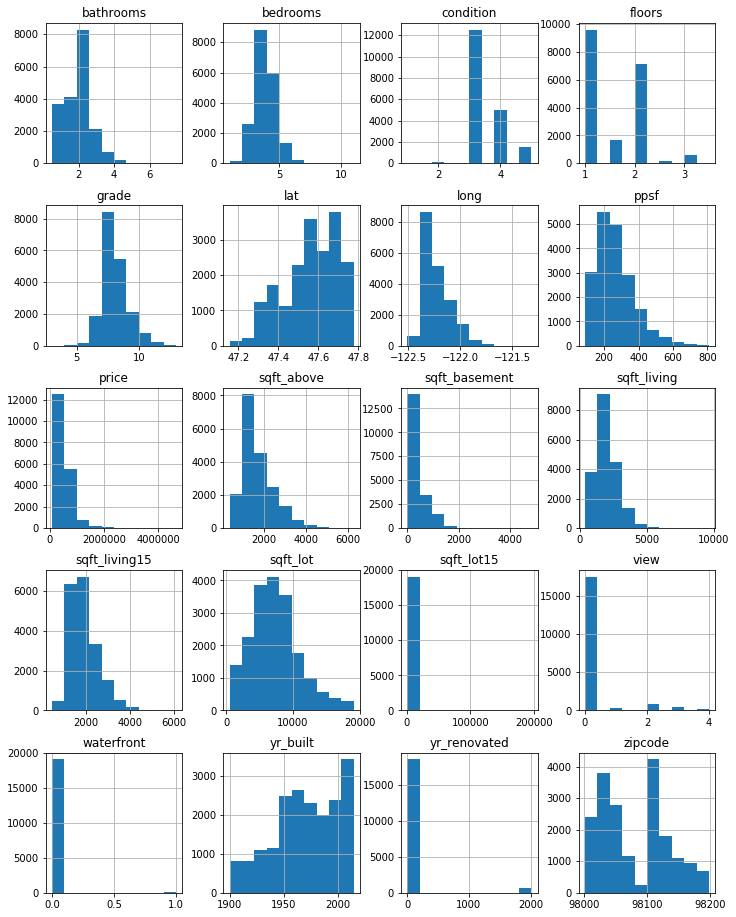

In [33]:
ax = seattle_filtered.hist(figsize = (12,16))

## Results from .hist()

## hist() helps determine which features are likely categorical and which are likely continuous

* Categoricals include: view, waterfront, yr_renovated, condition, floors, possibly bedrooms and bathrooms, zipcode, yr_built
* Continuous variables include:  lat, long, sqft_living (and all other sqft features)

## hist() also helps show which features have outliers (long tails in the distribution)

* Outliers on continuous features tend to distort models.  Because hist() is auto-scaling the x-axis, if there is "nothing shown" at the right or left of the axis,  it indicates there there is data at thos points,  but very few data points.

* Examples here are: bedrooms (there is one property with 33 bedrooms), bathrooms, sqft_living (and related sqft metrics, and price.  Price is the target,  we will look at it because it seems to have a huge distribution

## Review feature correlation

Looking at a correlation matrix reveals features which are potentially over-correlated (causing co-linearity)
When a correlation of ~0.75 or greater is found between features, it is often best to remove one of the features


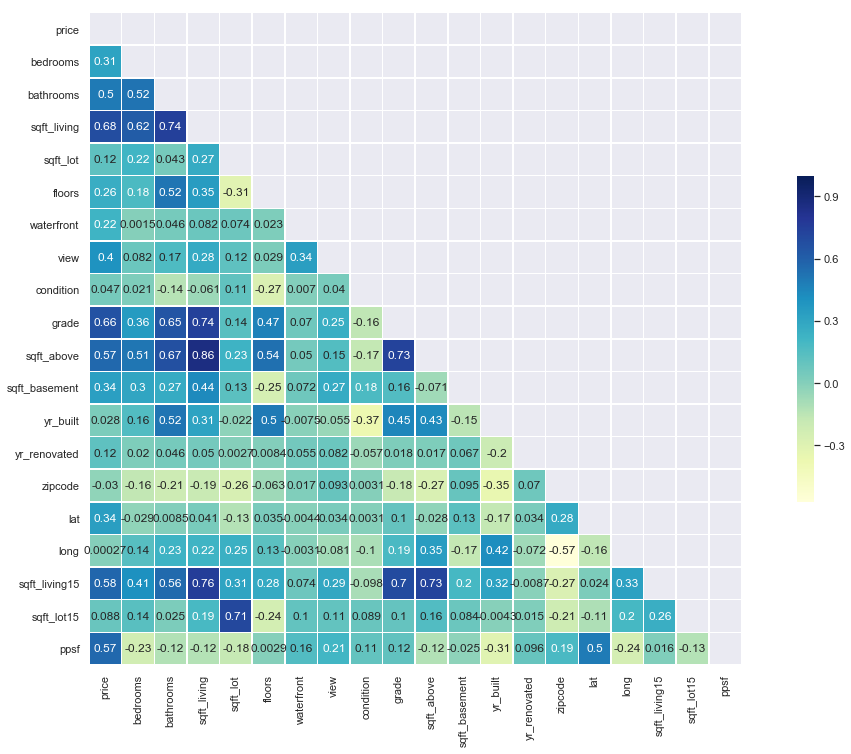

In [34]:
# Run a Correlation matrix
sns.axes_style("white")

pearson = seattle_filtered.corr(method = 'pearson')

sns.set(rc={'figure.figsize':(20,12)})

# Generate a mask for the upper triangle
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data=pearson, mask=mask, cmap="YlGnBu", 
                 linewidth=0.5, annot=True, square=True, cbar_kws={'shrink': 0.5})

plt.savefig("Correlation.png")
plt.savefig("Correlation 2.png", transparent = True)

## Results of .corr()

* Pairs of features that have higher correlation (> 0.75)
    
    * sqft_living and sqft_above - 0.84  - Unsurprising.  sqft_living is comprised of sqft_above and sqft_basement, but only ~35% of houses have basements
    
    * sqft_living and sqft_living15  - 0.7 - The information provided say that this sqft_living15 is the living space of the adjacent 15 houses.  This makes sense when there is a lot of community tract houses, built at the same time, in the same location.  However, generally speaking this doesn't make sense.
    
    * sqft_living and grade - 0.7 - Makes sense since grade is an assessment made which includes sqft_living
    
    * sqft_above and grade - 0.69 - because sqft_living and sqft_above are strongly correlated
    
#### Based on this analysis, I recommend removing sqft_above from the model in order to reduce co-linearity. However, to show this impact, we will leave these features in the dataframe and remove them at the time of modelling

## Now let's look at some visualizations to see where our data is coming from geo-spatially, which may suggest good questions to ask

### Let's look at location


<div>
<img src="map showing key zips.gif" width="300"/> <img src="kde on map 2.gif" width="300"/> 
</div

Note: The KDE map was manually overlaid to the physical King County map.   A future work will be to see how to do the overlay of these plots using a software package like Bokeh or Tableau,  which is outside the scope of this project.



### As mentioned, our audience is comprised of the top 1% of real estate brokers in King County.  A natural question to ask is whether the analysis pertains to their specific territory or region.   The KDE shows the vast majority of the sales data coming from the coastal region.   Thus, if brokers in the audience are selling properties inland,  the results of this analysis may not pertain to their territories. 

### Showing the audience where the data comes from,  provides a meaningful point of reference based on the audience's background, and helps establish expectations for the results

In [35]:
#![Zipcode Geo-Spatial map](zipcodes_WestKC.gif "Zipcodes in King County")
#https://aqua.kingcounty.gov/gis/web/VMC/boundaries/zipcodes/zipcodes.pdf

C:\Users\zachmih\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


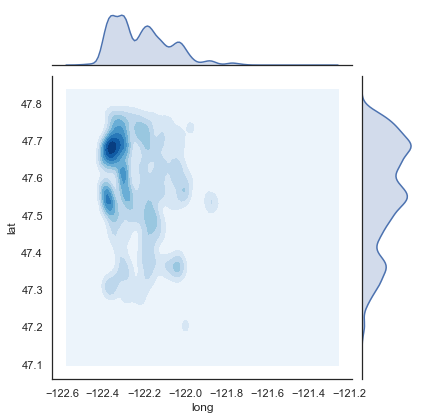

In [36]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=seattle_df["long"], y=seattle_df["lat"], kind='kde', cmap="Blues", 
              shade=True, shade_lowest=True);

ax.set_title("What part of King County is the Model Based on?");
ax.set_xlabel("Latitude");
ax.set_ylabel("Longitude");

plt.savefig("kde jointplot transparent.png", transparent = True);

##  3D Geo-spatial visualization using the longitude and latitude data

*  This style of visualization allows 2-D and 3-D visualization of the distribution and density of our data (KDE, or Kernel Density Estimate) based on latitude and longitude. The plot is a non-parameterized way to estimate the probability density function of the data.  

*  In plain English, this plot shows us where most of the house sales were on the map (based on lat and long).  This tells us where the majority of the data comes from.  The darker the hue, the more home sales in that area.

*  From the standpoint of interpretability, I use this plot to tell realtors that our model is based on data from the most popular part of King County,  where there is a lot of turnover of house inventory.

*  The joint plots are the slice of the probability density, at the maximum density, and show the shape of the probability density of sales. The shape shown is "hilly"  which is because that part of the county, the landmass is not continuous,  but is broken up numerous large and small bodies of water (where few or no houses have been sold).


## Another way to do 3-D plot is to create a scatter plot  of longitude and latitude, binning by a 3rd axis,  such as price, year-built, or sqft_living.

* Below we show the results for the above, plus also the calculated price per square foot PPSF.

In [37]:
# Another way to plot is to characterize continuous variables in deciles using the .qcut()
# .qcut() refers to quantiles.  In the case of deciles, we have q = 10, (0, 0.1, 0.2, 0.3....0.8, 0.9, 1.0)
# For q = 4,  quartiles (0, 0.25, 0.5, 0.75, 1)

seattle_df['Price %'] = pd.qcut(seattle_df['price'], q=10, labels=list(range(10))).astype(int)
seattle_df['Year Built %'] = pd.qcut(seattle_df['yr_built'], q=10, labels=list(range(10))).astype(int)
seattle_df['Square Foot Living Space %'] = pd.qcut(seattle_df['sqft_living'], q=10, labels=list(range(10))).astype(int)
seattle_df['Price Per Square Foot %'] = pd.qcut(seattle_df['ppsf'], q=10, labels=list(range(10))).astype(int)

# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

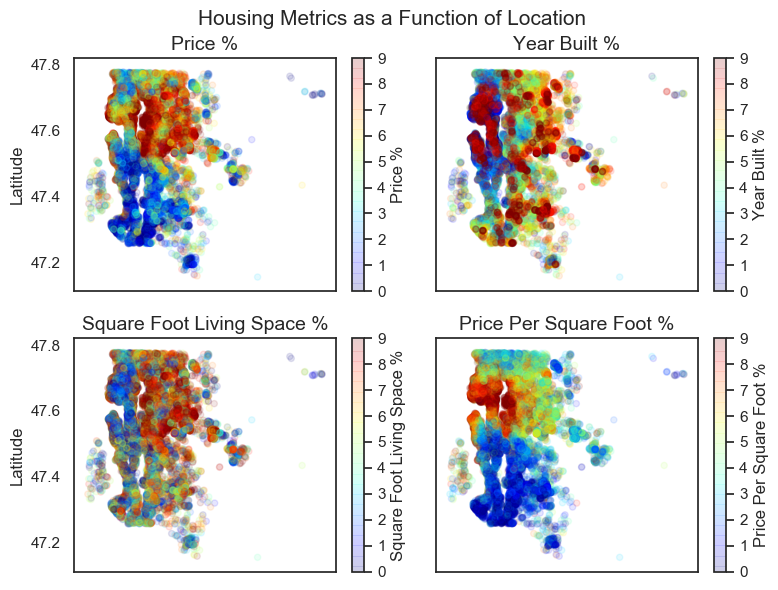

<Figure size 1440x864 with 0 Axes>

In [38]:
# Create the scatter plot categorizing the data by percentiles 

def scatter_map(df, col_name, axes):
    df.plot(kind='scatter', x='long', y='lat', c=col_name, 
            cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.1, ax=axes)
    axes.set(xlabel='Longitude', ylabel='Latitude')
    axes.set_title(col_name, fontsize=14)
    return axes
       
fig, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(8, 6), dpi=100)

scatter_map(seattle_df, 'Price %', axes.flat[0]);
scatter_map(seattle_df, 'Year Built %', axes.flat[1]);
scatter_map(seattle_df, 'Square Foot Living Space %', axes.flat[2]);
scatter_map(seattle_df, 'Price Per Square Foot %', axes.flat[3]);
fig.suptitle('Housing Metrics as a Function of Location', fontsize=15);
#fig.delaxes(axes.flat[3])
fig.tight_layout();
fig.subplots_adjust(top=0.9);
plt.show();
plt.savefig("scatterplot.png");

##  These 3-D visuals show there is a systematic price per square foot trend to location

* The highest prices (shown in red on the scatter plots,  and in green on the map images) are on the shores of Lake Washington and the Puget Sound, closest to Seattle, where the views of both the water and the city of seattle are likely to be very good.   The prices are lower towards the south of Lake Washington. 

* Newer housing has been built, mostly away from the direct waterfront areas, inland, and to the south

* Larger houses are essentially along Lake Washington facing West, towards Seattle, inland, and south,  corresponding to newer builds.

* The price per square foot shows that housing prices are the highest radiating North of Seattle and to the East,  not only at the coast, but throughout the peninsula.  Very high price per square foot above Seattle, given that the house sqft_living is smaller in that area, and the houses are generally older.

## The systematic price per square foot trend to latitude (i.e. the colors are consistently the same, within an area and not so splotchy)   is  unexpected finding

### This suggests that there is a pricing rationale at work.   Despite other variables, such as age, the price normalized by square foot is very consistent by region,  which suggests houses prices are sold using price per square foot as the primary metric,  rather than a more complicated model.

### Our audience which is comprised of the top 1% of brokers in the region, will likely accept the data as being solid, and by association,  the conclusions may be more readily accepted

In [ ]:
# Make some of the changes permanent

seattle_df.drop(['Price %', 'Year Built %',
       'Square Foot Living Space %', 'Price Per Square Foot %'],
            axis = 1, inplace = True)
seattle_df.columns

## Because pricing or price per square foot, is so strongly influeced by latitude (location), we should tae a closer look at Price vs. Zipcode using Boxplots
## In particular, let's try to anticipate the questions our audience (realtors) might have regarding price and location

1. Is there any significant trends between zipcode and price ?
2. Is there any good way to group price trends?
3. What's the home price impact of having waterfront housing ?
4. Is there a significant difference between houses on the peninsula versus away from the coastline ?


* Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
* Compare to the Pandas dateaframe, and you will see that the labelling in Matplotlib is done correctly

* Be very careful -- using an "equivalent" code in Seaborn will lead to a wrong x-axis labelling
    * Example shown later on below, with validation using the Pandas groupby
* Since Seaborn doesn't throw an error,  it's easy to be mis-lead

In [ ]:
yellow = dict(markerfacecolor='y')
sns.set(rc={'figure.figsize': (16,12)})
seattle_filtered.boxplot(by='zipcode', column='price', fontsize = 12, rot = 90, flierprops = yellow);

plt.title('Boxplots of Price Variation ($) Grouped by Zipcode', fontsize = 16)

plt.xlabel('Zipcodes in King County', fontsize = 12);
plt.ylabel('Price, $', fontsize = 12);
plt.savefig("Price vs Zip.png")


# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

## As data scientists,  we may not be domain experts in real estate.  Getting someone else's buy-in means learning something about another persons' reality so as to make a better "connection".  

## Just like a best practice when you go to a foreign country to is learn a few words like "hello", "please" "thank you",  and "excuse me" will a long way to helping others relate, a best practice in data science is to think about real estate basics,  such as location,  to connect with the audience.

## Go onto Google and pull up the King County zip code map and see what you can see. King county extends off to the east, but this picture is just the coastal region,  since that's where all the data comes from.


<div>
<img src="key zips enlarged.gif" width="300"/>
</div


##  
## We notice that the peninsula (outlined in black) has zip codes all starting with '981XX',  and the other zipcodes in the county are '980XX' zipcodes.

## Some Conclusions from Prices vs. Zipcode

1. Is there any significant trends between zipcode and price ?
2. Is there any good way to group price trends?

#### 3 zipcodes (98004, 98039, 98040) seem to have medians values much greater than 1 Million dollars. 
#### The map shows the reason why:   these are very special geographical areas (see green outline)
#### 98004 - East bank of Lake Washington with prime views of downtown Seattle
#### 98039 - Island of Medina on Lake Washington
#### 98040 - Mercer Island, on Lake Washington
###  


### Investigate to see if there are price trends based on zip code

In [ ]:
# Separate out the 981XX and 980XX zipcode data
zip_cut = np.where((seattle_df['zipcode']) >= 98100 , '981XX', '980XX')
seattle_df.groupby(zip_cut)['price'].describe().rename(columns = {'count': '# of Houses', 'mean': 'Mean Price $',
                                                                 'std': 'Price Variation $', 'min': 'Min Price $',
                                                                 '25%': '1st Quartile $', '50%': 'Median Price $',
                                                                 '75%': '3rd Quartile $', 'max': 'Max Price $'})

# Conclusion:  These two populations look very similar -- but the 980XX population includes 3 zipcodes
# which are very different :  98004, 98039, 98040  when you look at the boxplot above

In [ ]:
# Reference for dropping based on condition
# https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving
seattle_new = seattle_filtered.drop(seattle_filtered[(seattle_filtered.zipcode==98004) | (seattle_filtered.zipcode==98039) | 
                                         (seattle_filtered.zipcode==98040)].index)
zip_cut = np.where((seattle_new['zipcode']) >= 98100,'981XX', '980XX')
seattle_new.groupby(zip_cut)['price'].describe().rename(columns = {'count': '# of Houses',
                                                                  'mean': 'Mean Price $', 'std': 'Price Variation $',
                                                                  'min': 'Min Price $', '25%': '1st Quartile $',
                                                                  '50%': 'Median Price $', '75%': '3rd Quartile $',
                                                                  'max': 'Max Price $'})

## The two groupings of zipcodes have very similar pricing distributions.  

## Houses in the 981XX zipcode have a median house price difference of 50,000 dollars over those in the 980XX zips (excluding special areas)

## Thus location by zip ~ 10% differential in median price
* Removal of the 98004, 98039, and 98040 zip makes a big difference for the max price

* Consider keeping these two datasets separate -- create two different datasets
* Future work:  add a column with a label to indicate different regional groups such as those in the 981XX and 980XX zip codes, as well as those in special super high value real estate areas

## The home price impact by having waterfront 

* Less than 1% of houses have waterfront access
* Median house price per square foot can be more than double those without waterfront
* Median house prices can almost triple, depending on other factors, such as lot size and other factors

## The analysis is shown below


In [ ]:
seattle_df.groupby('waterfront')['ppsf','price'].describe().rename(columns = {'count': '# of Houses',
                            'mean': 'Mean', 'std': 'Variation', 'min': 'Min', 
                            '25%': '1st Qtl','50%': 'Median', '75%': '3rd Qtl',
                            'max': 'Max', 'ppsf': 'Price Per Sq Ft $/SF', 'price': 'Price $'})

In [ ]:
seattle_filtered.groupby('waterfront')['ppsf','price'].describe().rename(columns = {'count': '# of Houses',
                            'mean': 'Mean', 'std': 'Variation', 'min': 'Min', 
                            '25%': '1st Qtl','50%': 'Median', '75%': '3rd Qtl',
                            'max': 'Max', 'ppsf': 'Price Per Sq Ft $/SF', 'price': 'Price $'})

In [ ]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (6,5)})
boxplot = sns.boxplot(x=seattle_df.waterfront, y=seattle_df.price, 
                      width=0.5, palette="Reds", );

boxplot.set_xticklabels(labels = ['No Waterfront', "Waterfront"],);
boxplot.axes.set_title("Comparison of house prices in King County with and without waterfront)",
                    fontsize=16)
 
boxplot.set_xlabel("Comparison of Home Prices Without and With Waterfront ", 
                fontsize=14)
 
boxplot.set_ylabel("Price, '$'",
                fontsize=14)
 
boxplot.tick_params(labelsize=12)


## Let's take a look at the price distributions on the original data

In [ ]:
# Plot price and price per square foot distributions
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Home Price Distributions in King County (After filtering lot and living areas)", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Price Distribution", fontsize=12)
ax1.set_ylabel("Distribution A.U.",)
sns.distplot(seattle_df['price'], ax=ax1, color='b', axlabel='Price $');

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Price Per Sq Ft Distribution",)
ax2.set_ylabel("Distribution A.U.", ) 
sns.distplot(seattle_df['ppsf'], ax=ax2, color='r', axlabel = "Price Per Sq Ft $/SqFt");




## Price Distribution is non-normal and still has a long tail

* This plot is auto-scaled and so suggests that there are outliers in the data which were also seen in the boxplot
* We can see if applying a filter on the price distribution is of any help


In [ ]:

filtered_price = filter_outliers(seattle_df, 'price')
filtered_ppsf = filter_outliers(seattle_df, 'ppsf')


## Results from Calculation of Interquartile Means
* Because of the non-normality of the distribution and non-centered mean value, the calculation of the cutoff for outliers goes to negative values.
* Thus no data will be filtered from the low end of price

## Take a look at the price distribution, post filter


In [ ]:
# Plot price and price per square foot distributions
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Price Distributions in King County After Removing Outliers", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Price Distribution")
#ax1.set_xlabel("Prices $")
ax1.set_ylabel("Distribution A.U.") 
sns.distplot(filtered_price['price'], ax=ax1, color='b', axlabel='Price $');

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Price Per Sq Ft Distribution")
#ax2.set_xlabel("Price Per Sq Foot $/Sq Ft")
ax2.set_ylabel("Distribution A.U.") 
sns.distplot(filtered_ppsf['ppsf'], ax=ax2, color='r', axlabel='Price per Sq Ft $/Sq Ft');

## General Observations
1. Higher prices at higher latitudes, and longitudes below -122.0

2. On the face of it, the zipcode is not a good predictor of pricing,  -- there is roughly a 10% difference in median home prices between the 981XX zip code and the 980XX zip code.

3. Waterfront commands roughly 2X increase in Median Price Per Square Foot.  Median house prices can increase almost 3X depending on other factors. 

## Modeling comparisons

## We have several datasets which have been cleaned differently to see what is the impact of cleaning on linear regression modelling

1. seattle_df  - original dataset with Nans, wrong data inputed,  and datatypes converted as needed
2. seattle_filtered - filtering outliers based on sqft_lot and then sqft_living
3. filtered_price - filtering price outliers from seattle_df(1.)
4. filtered_ppsf - filtering ppsf outliers from seattle_df (1.)


## Create a Multi-Linear Regression Model
## Modelling Strategy

### 1.  In most cases, one would split the data into a train and test set. We will leave that to future work.

#### However, in this case we are just going to stick with training all the data

### 2. Encoding, Log Transformation, and Normalization of categoricals and feature normalization of continuous variables, for all cases.

#### In this case we will include the code and function definitions for encoding of categoricals and continuous variables,  but only perform this on the "best" model data based on the cases above.

### 3. Perform step-wise feature selection

### 4.  Analyse the model results
    * Review the features p-values and ensure that the null-hypothesis is not true
    * Review the adjusted accuracy.  Generally the higher the better
    * Review the Condition Number  -- Normally <20 is desirable,  which means that the features are not co-linear
    * Revew the Skew and Kurtosis of the model

In [ ]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.5, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    This function comes from the Flatiron School curriculum
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
# Future Work - automate this portion of the analysis
# Had difficulty creating a single function call that would perform the feature selection and model at the same time

data_1 = seattle_df.drop(columns = ['price','sqft_living15', 'sqft_lot15', 'sqft_above', 'ppsf',])
data_2 = seattle_filtered.drop(columns = ['price','sqft_living15', 'sqft_lot15', 'sqft_above', 'ppsf',])
data_3 = filtered_price.drop(columns = ['price','sqft_living15', 'sqft_lot15', 'sqft_above', 'ppsf',])
data_4 = filtered_ppsf.drop(columns = ['price','sqft_living15', 'sqft_lot15', 'sqft_above', 'ppsf',])

In [ ]:
data_1.shape, data_2.shape, data_3.shape, data_4.shape

In [ ]:
X = data_1
y = pd.DataFrame(seattle_df, columns = ['price'])
res1 = stepwise_selection(X, y, verbose = False)

X = data_2
y = pd.DataFrame(seattle_filtered, columns = ['price'])
res2 = stepwise_selection(X, y, verbose = False)

X=data_3
y = pd.DataFrame(filtered_price, columns = ['price'])
res3 = stepwise_selection(X, y, verbose = False)

X=data_4
y = pd.DataFrame(filtered_ppsf, columns = ['price'])
res4 = stepwise_selection(X, y, verbose = False)


In [ ]:
# Run the OLS model with the features selected and stored in results
X_fin = X[res1]
X_with_intercept = sm.add_constant(X_fin)
model1 = sm.OLS(y, X_with_intercept).fit()
model1.summary()



In [ ]:
X_fin = X[res2]
X_with_intercept = sm.add_constant(X_fin)
model2= sm.OLS(y, X_with_intercept).fit()
model2.summary()

In [ ]:
X_fin = X[res4]
X_with_intercept = sm.add_constant(X_fin)
model4 = sm.OLS(y, X_with_intercept).fit()
model4.summary()

In [ ]:
X_fin = X[res3]
X_with_intercept = sm.add_constant(X_fin)
model3 = sm.OLS(y, X_with_intercept).fit()
model3.summary()

## Analysis 

###  The Adjusted R2 accuracy is 0.738.  However, the condition number shows the features are highly co-linear

###  All of the p-values are smaller than 0.05

###  Skew and Kurtosis could be better

##  Encoding and Normalization Procedures

* Normalization could change the accuracy slightly,  and it is supposed to improve the skew and kurtosis
* Encoding may improve the accuracy by allowing the linearity / normality of the data to be more important than the labeling of the data.  However, from working with this particular data,  encoding isn't playing a significant role.

This section is about re-binning for categorical features and performing hot-encoding. 

We have decided based on the ETL that the categoricals we can use are: waterfront, floors, view, condition, grade, yr_built, yr_renovated, zipcode



In [ ]:
cat_df = seattle_df.copy()

In [ ]:
cat_df.columns

In [ ]:
cat_df.drop(['price','bedrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built',
            'lat', 'long', 'sqft_above','sqft_living15','sqft_lot15', 'ppsf'],
            axis = 1, inplace = True)

# Drop all continuous variables and other intermediate values

In [ ]:
cat_df.dtypes

In [ ]:
cat_df.bathrooms.describe()

In [ ]:
# The bathrooms need to be categorized;  appears to be some typos in the data 


In [ ]:
cat_df.bathrooms.describe()

In [ ]:
bins = [0, 1.75, 2.25, 3, 8]
bins_bathrooms = pd.cut(seattle_df['bathrooms'], bins)
bins_bathrooms.cat.as_ordered()
bins_bathrooms.head()

In [ ]:
# bins_bathrooms.value_counts().plot(kind = 'bar', figsize = (3,3));

In [ ]:
cat_df['bathrooms'] = bins_bathrooms

In [ ]:
cat_df.floors.describe()

In [ ]:
bins = [0, 1.5, 2, 4]
bins_floors = pd.cut(seattle_df['floors'], bins)
bins_floors.cat.as_ordered()
bins_floors.head()

In [ ]:
# bins_floors.value_counts().plot(kind = 'bar', figsize = (3,3));

In [ ]:
cat_df['floors'] = bins_floors

In [ ]:
cat_df.grade.describe()

In [ ]:
bins = [0, 6, 7, 8, 13]
bins_grade = pd.cut(cat_df['grade'], bins)
bins_grade = bins_grade.cat.as_ordered()
bins_grade.head()

In [ ]:
# bins_grade.value_counts().plot(kind='bar', figsize=(3,3));

In [ ]:
cat_df['grade']= bins_grade

In [ ]:
cat_df['condition'].describe()

In [ ]:
bins = [0,3,5]
bins_condition = pd.cut(cat_df['condition'], bins)
bins_condition.cat.as_ordered()
bins_condition.head()

In [ ]:
# bins_condition.value_counts().plot(kind = 'bar', figsize =(3,3));

In [ ]:
cat_df['condition']= bins_condition

In [ ]:
cat_df['yr_renovated'] = cat_df['yr_renovated'].astype('category')
cat_df['yr_renovated'] = cat_df['yr_renovated'].cat.codes

In [ ]:
cat_df['zipcode'].describe()

In [ ]:
bins = [0, 98050, 98075, 98199]
bins_zipcode = pd.cut(cat_df['zipcode'], bins)
bins_zipcode.cat.as_ordered()
bins_zipcode.head()

In [ ]:
# bins_zipcode.value_counts().plot(kind='bar', figsize = (3,3));


In [ ]:
cat_df['zipcode'] = bins_zipcode

In [ ]:
# convert the data to categoricals
cat_df.waterfront = cat_df.waterfront.astype('category')
cat_df.view = cat_df.view.astype('category')
cat_df.yr_renovated = cat_df.yr_renovated.astype('category')
cat_df.floors = cat_df.floors.astype('category')
cat_df.bathrooms = cat_df.bathrooms.astype('category')
cat_df.condition = cat_df.condition.astype('category')
cat_df.grade = cat_df.grade.astype('category')
cat_df.zipcode = cat_df.zipcode.astype('category')

In [ ]:
# Apply Label Encoding to categoricals

cat_df['waterfront'] = cat_df['waterfront'].cat.codes
cat_df['bathrooms'] = cat_df['bathrooms'].cat.codes
cat_df['yr_renovated']= cat_df['yr_renovated'].cat.codes
cat_df['view'] = cat_df['view'].cat.codes
cat_df['grade'] = cat_df['grade'].cat.codes
cat_df['condition'] = cat_df['condition'].cat.codes
cat_df['zipcode'] = cat_df['zipcode'].cat.codes
cat_df['floors'] = cat_df['floors'].cat.codes

In [ ]:

bathrooms_dummy = pd.get_dummies(bins_bathrooms, prefix = "BATH", drop_first = True)
floors_dummy = pd.get_dummies(bins_floors, prefix = 'FLR', drop_first = True)
conditions_dummy = pd.get_dummies(bins_condition, prefix = "CON", drop_first = True)
grade_dummy = pd.get_dummies(bins_grade, prefix= 'YRBLT', drop_first = True)
zipcode_dummy = pd.get_dummies(bins_zipcode, prefix = 'ZIP', drop_first = True)


## Now check to see if transformations (such as log transform) help to improve the normality of continuous data

* The continuous variables are: bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, long,
  lat,
* I'm dropping off some data columns which were shown to have high correlation with sqft_living (sqft_living15)
  

In [ ]:
seattle_df.columns

In [ ]:
# Prepare to check for log transformations on continuous data
cont_df = seattle_df.copy()

cont_df.drop(['price','floors','waterfront', 'bathrooms','view', 'grade',
               'sqft_above', 'zipcode', 'ppsf', 'sqft_living15' ],
            axis = 1, inplace = True)

In [ ]:
# Try out log transformations
data_log = pd.DataFrame([])
#data_log['bathrooms'] = np.log(cont_df['bathrooms'])
data_log['bedrooms'] = np.log(cont_df['bedrooms'])
data_log['lat'] = np.log(cont_df['lat'])

# data_log['long'] = np.log(cont_df['long'])  - due to negative numbers

data_log['sqft_living'] = np.log(cont_df['sqft_living'])
data_log['sqft_lot'] = np.log(cont_df['sqft_lot'])
data_log['sqft_lot15'] = np.log(cont_df['sqft_lot15'])
#data_log['sqft_basement'] = np.log(cont_df['sqft_basement']) # too many zeros

data_log['yr_built'] = np.log(cont_df['yr_built'])

data_log.hist(figsize = [8,8]);


##  Observation:  The only features really improved by log transformations are the sqft_living, so keep the transformation for those features

## Now perform scaling or normalization on continuous variables



In [ ]:
# Normalization
# Use min-max normalization on log transformed features:  log_sqft_living, log_sqft_living15, log_sqft_above
# Use min-max normalization on sqft_basement, sqft_lot, sqft_lot15
# Use mean normalization on the bedrooms and bathrooms
# Use standardization on yr_built, lat, long

#bathrooms = cont_df['bathrooms']
bedrooms = cont_df['bedrooms']
log_sqft_living = data_log['sqft_living']


sqft_basement = cont_df['sqft_basement']
sqft_lot = data_log['sqft_lot']
sqft_lot15 = data_log['sqft_lot15']

yr_built = cont_df['yr_built']
lat = cont_df['lat']
long = cont_df['long']

# Mean Normalization
#scaled_bathrooms = (bathrooms - np.mean(bathrooms)) / (max(bathrooms) - min(bathrooms))
scaled_bedrooms = (bedrooms - np.mean(bedrooms)) / (max(bedrooms) - min(bedrooms))


# Min-Max Scaling on log transformed data
scaled_logsqft_liv = (log_sqft_living - min(log_sqft_living)) / (max(log_sqft_living) - min(log_sqft_living))

# Min-Max Scaling on non-log transformed features:  sqft_basement
scaled_sqft_basement = (sqft_basement - min(sqft_basement)) / (max(sqft_basement)- min(sqft_basement))
scaled_sqft_lot = (sqft_lot - min(sqft_lot)) / (max(sqft_lot)- min(sqft_lot))
scaled_sqft_lot15 = (sqft_lot15 - min(sqft_lot15)) / (max(sqft_lot15)- min(sqft_lot15))

# Standardization
scaled_yrbuilt = (yr_built - np.mean(yr_built)) / np.sqrt(np.var(yr_built))
scaled_lat = (lat - np.mean(lat)) / np.sqrt(np.var(lat))
scaled_long = (long - np.mean(long)) / np.sqrt(np.var(long))

cont_df2 = pd.DataFrame([])
cont_df2['bedrooms'] = scaled_bedrooms
#cont_df2['bathrooms'] = scaled_bathrooms

cont_df2['sqft_living'] = scaled_logsqft_liv

cont_df2['sqft_basement'] = scaled_sqft_basement
cont_df2['sqft_lot'] = scaled_sqft_lot
cont_df2['sqft_lot15'] = scaled_sqft_lot15

cont_df2['yr_built'] = scaled_yrbuilt
cont_df2['lat'] = scaled_lat
cont_df2['long'] = scaled_long

price = seattle_df['price']
df_final = pd.concat([price, cat_df, cont_df2], axis=1, sort=False)



In [ ]:
df_final.columns

## Model Building after normalization on seattle_df dataframe


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df_final.columns   # df_final is the normalized data

In [ ]:
data_model = df_final.drop(columns = ['price', 'sqft_lot15'])

In [ ]:
X = data_model
y = pd.DataFrame(df_final, columns = ['price'])

result = stepwise_selection(X, y, verbose = True)

print("Resulting features")
print(result)

In [ ]:
import statsmodels.api as sm
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y, X_with_intercept).fit()
model.summary()

## Unfortunately, normalization didn't much help the model accuracy.
## None of the feature p-values are > 0.05
## The Collinearity improved.

## The top 5 contributors to the model have been latitude, grade, living area, view and age of the home (year built)

## Let's look a little deeper into grade  to see what kind of price impact we can see,  A homeowner can potentially make improvements to the home or land, to improve the Grade score - so let's try to see what they are worth.

In [ ]:
# Let's start with grade,  it might be the easier one

In [ ]:
seattle_df.groupby('grade')['price','ppsf'].describe().rename(columns = {'count': '# of Houses',
                            'mean': 'Mean', 'std': 'Variation', 'min': 'Min', 
                            '25%': '1st Qtl','50%': 'Median', '75%': '3rd Qtl',
                            'max': 'Max', 'ppsf': 'Price Per Sq Ft $/SF', 'price': 'Price $'})

In [ ]:
# Let's take a look at the one house that is a grade 3, and may be a typo
seattle_df.sort_values(by=['grade']).head(1)

In [ ]:
seattle_df = seattle_df.drop(seattle_df[seattle_df.grade == 3].index)
seattle_df.shape
#reference: https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving

In [ ]:
#new_df = seattle_df.groupby('grade')['price', 'ppsf'].median()
new_df = seattle_df[['grade', 'price', 'ppsf']].copy()

new_df.groupby('grade')['price','ppsf'].describe().rename(columns = {'count': '# of Houses',
                            'mean': 'Mean', 'std': 'Variation', 'min': 'Min', 
                            '25%': '1st Qtl','50%': 'Median', '75%': '3rd Qtl',
                            'max': 'Max', 'ppsf': 'Price Per Sq Ft $/SF', 'price': 'Price $'})

#reference: https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy

In [ ]:
# We will drop out that value
# Then do a bar chart for both price and price per square foot
# Visualization to Determine Ways to Condition the Data
# References: 

# https://jovianlin.io/data-visualization-seaborn-part-2/

# https://jovianlin.io/data-visualization-seaborn-part-3/

fig = plt.figure(figsize=(10,4))

title = fig.suptitle("Grade Value for Homes in King County", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.35, )

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Impact of Grade Value on Price", fontsize=12)
#ax1.tick_params(labelsize=12)
sns.barplot(x='grade', y='price', data=new_df.reset_index(), ax=ax1);
ax1.set_ylabel("Median Price $",)
ax1.set_xlabel("Grade")
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Impact of Grade Value on Price per Sq Foot",)

sns.barplot(x='grade', y='ppsf', ax=ax2, data=new_df.reset_index(),);
ax2.set_ylabel("Median Price Per Sq Ft($ / Sqft)");
ax2.set_xlabel("Grade");

## The King County Grade can have an impact on both Median Home Price as well as Median Price Per Sq Ft.  

### Median Home Price appears to scale monotonically with the Grade. What’s a bit more interesting is that the Median Price Per Sq. Foot doesn’t scale monotonically with grade.

### Approximate doubling of the median home prices from grade '5.5 to 8,  8 to 10, and from 10 to "11.5"



In [ ]:
seattle_new = seattle_filtered.drop(seattle_filtered[(seattle_filtered.zipcode==98004) | (seattle_filtered.zipcode==98039) | 
                                         (seattle_filtered.zipcode==98040)].index)
zip_cut = np.where((seattle_new['zipcode']) >= 98100,'981XX', '980XX')
seattle_new.groupby(zip_cut)['price'].describe().rename(columns = {'count': '# of Houses',
                                                                  'mean': 'Mean Price $', 'std': 'Price Variation $',
                                                                  'min': 'Min Price $', '25%': '1st Quartile $',
                                                                  '50%': 'Median Price $', '75%': '3rd Quartile $',
                                                                  'max': 'Max Price $'})

In [ ]:
new_df2 = seattle_df[['zipcode', 'grade', 'price', 'ppsf']].copy()

seattle_new = new_df2.drop(new_df2[(new_df2.zipcode==98004) | (new_df2.zipcode==98039) | 
                                   (new_df2.zipcode==98040)].index)

zip_cut = np.where((seattle_new['zipcode']) >= 98100,'981XX', '980XX')

seattle_new.groupby([zip_cut,'grade'])['price', 'ppsf'].describe().rename(columns = {'count': '# of Houses',
                                                                  'mean': 'Mean', 'std': 'Variation',
                                                                  'min': 'Min', '25%': '1st Qtl',
                                                                  '50%': 'Median', '75%': '3rd Qtl',
                                                                  'max': 'Max', 'price': "Price  $", 
                                                                   'ppsf': 'Price Per SqFt   $/SqFt'})



## Splitting by zipcode shows that the curious feature of increased Median Price Per Square Foot at low Grades,  only on on the 980XX properties.

## Future work as to why that is

## The trend of higher median price per sqft at lower grades is a trend primarily on the 980XX zipcodes. 

## Personal notes

In [ ]:
# Seaborn plots the "Groupby",  but messes up the zipcode label order
# This problem was reported as a PR back in 2013,  and was supposed to be fixed/closed.
# https://github.com/mwaskom/seaborn/issues/14

# However, the current documentation is confusing and difficult to understand how to condition the data to 
# get it to display properly.  There is no discussion on the impact of not specifying
# the label order,  since a plot with the wrong order of x labels is extremely misleading
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

# Given that the boxplot itself is constructed properly by grouping together the data of the same zipcode
# to get the quartiles, median, and outlier positions,  it would be far better that Seaborn would attach the correct 
# labels to the grouped values --as the default.  Not as something that to be done separately

sns.set(rc={'figure.figsize':(20,12)})
sns.set(style="whitegrid")
boxplot = sns.boxplot(x=seattle_df.zipcode, y=seattle_df.price, 
                      width=0.5, palette="Set3");

boxplot.set_xticklabels(labels = seattle_df.zipcode, rotation=90);
boxplot.axes.set_title("Variation of Prices in King County by Zipcode (Wrong Zipcode Order, do not use!)",
                    fontsize=16)
 
boxplot.set_xlabel("Zipcodes in King County -- Wrong Zipcode Order !!! ", 
                fontsize=14)
 
boxplot.set_ylabel("Price, '$'",
                fontsize=14)
 
boxplot.tick_params(labelsize=12)


# According to Seaborn documentation,  need to put provide the x-axis labels as a list of strings.
# However, the way I got to the list of strings (called x_axis) didn't seem to work
#x_axis = seattle_df['zipcode'].astype(str).tolist()
#sns.set(style="whitegrid")
#ax = sns.boxplot(x=seattle_df.zipcode, y=seattle_df.price, width=0.5, palette="Set3", order=x_axis);
#ax.set_xticklabels(x_axis, rotation=90)



In [ ]:
test = seattle_df.groupby('zipcode')['price'].describe()
test.head()

# You can see that zipcode 98004 has a median of $1.15M and max of $7.06M
# If you look at the Seaborn graph,  zipcode 98004 is the very far to the right,  and the median and max do not match!
# if you look at the Pandas boxplot,  where the zipcodes are consecutive,  you find the data in the table matches that of the plot

Seattle Police Deparment Section 6.220 of the Police Manual

http://www.seattle.gov/police-manual/title-6---arrests-search-and-seizure/6220---voluntary-contacts-terry-stops-and-detentions

http://www.seattle.gov/police/information-and-data/terry-stops/terry-stops-dashboard

Effective Date: 01/01/2020

This policy applies to all sworn employees conducting voluntary contacts and/or stops/detentions based upon reasonable suspicion (Terry).

This policy does not apply to detentions based upon probable cause and community caretaking functions pursuant to RCW 71.05.153.

6.220 - POL – 1 Definitions

Seizure: A seizure occurs any time an officer, by means of physical force or show of authority, restricts the liberty of a person.  A seizure may also occur if an officer uses words, actions, or demeanor that would make a reasonable person believe that they are not free to leave.

Voluntary Contacts: During voluntary contacts, officers will not use any words, actions, demeanor, or other show of authority that would indicate that a person is not free to leave; voluntary contacts are not seizures.

Voluntary Contacts fall under two categories:

Social Contact: A voluntary and consensual encounter between the police and a subject with the intent of engaging in casual and/or non-investigative conversation. The subject is free to leave and/or decline any of the officer’s requests at any point; social contacts are not seizures.

Non-Custodial Interview: A voluntary and consensual investigatory interview that an officer conducts with a subject during which the subject is free to leave and/or decline any of the officer’s requests at any point; non-custodial interviews are not seizures.

Terry Stop: A brief, minimally intrusive seizure of a subject based upon articulable reasonable suspicion in order to investigate possible criminal activity. The stop can apply to people as well as vehicles. The subject of a Terry stop is not free to leave. A Terry stop is a seizure under both the state and federal constitutions.

- A Terry stop is a detention, based on reasonable suspicion, during which an officer may develop facts to establish probable cause or dispel suspicion.

- Stops and detentions initiated under probable cause will be made pursuant to Manual Sections:

- 6.010- Arrests;

- 6.280-Warrant Arrests;

- 16.230-Issuing Tickets and Traffic Contact Reports;

- 16.110-Crisis Intervention or;

- 15.020 - Charge-By-Officer

Reasonable Suspicion: Specific, objective, articulable facts, which, taken together with rational inferences, would create a well-founded suspicion that there is a substantial possibility that a subject has engaged, is engaging or is about to engage in criminal conduct.

-The reasonableness of a Terry stop is considered in view of the totality of the circumstances, the officer’s training and experience, and what the officer knew before the stop.

- During a stop, an officer may learn new information that can lead to additional reasonable suspicion or probable cause that a crime has occurred, but that new information cannot provide the justification for the original stop.

6.220 - POL – 2 Conducting a Terry Stop

1. Terry Stops are Seizures Based Upon Reasonable Suspicion

This policy prohibits Terry stops when an officer lacks reasonable suspicion that a subject has been, is, or is about to engage in the commission of a crime.

Searches and seizures by officers are lawful to the extent they meet the requirements of the 4th Amendment (see Terry v. Ohio, 392 U.S. 1 (1968), and Washington Constitution Art. 1, Section 7.

2. During a Terry Stop, Officers Will Limit the Seizure to a Reasonable Scope

Officers will articulate in their Report, the justification for the initiation, scope and duration of a Terry stop.

Actions that would indicate to a reasonable person that they are under arrest or indefinitely detained may convert a Terry stop to an arrest; however, taking any of these actions does not necessarily turn a Terry stop into an arrest.

Unless justified by the articulable reasons for the original stop, officers must have additional articulable justification for further limiting a person’s freedom during a Terry stop, such as:

- Taking a subject’s identification or driver license away from the immediate vicinity

- Ordering a motorist to exit a vehicle

- Putting a pedestrian up against a wall

- Directing a person to stand or remain standing, or to sit on a patrol car bumper or any other place not of their choosing

- Directing a person to lie or sit on the ground

- Applying handcuffs

- Transporting any distance away from the scene of the initial stop, including for the purpose of witness identification

- Placing a subject into a police vehicle

- Pointing a firearm at a person or occupied vehicle

- Frisking for weapons

- De minimis force

3. During a Terry Stop, Officers Will Limit the Seizure to a Reasonable Amount of Time

Subjects may be seized for only that period of time necessary to effect the purpose of the stop. Any delays in completing the necessary actions will be objectively reasonable.

Officers may not extend a detention solely to await the arrival of a supervisor.

4. During all Terry Stops, Officers Will Take Reasonable Steps to Be Courteous and Professional

When reasonable, as early in the contact as safety permits, the officer making contact with the subject (contact officer) will inform the suspect of the following:

- The officer’s name;

- The officer’s rank or title;

- The fact that the officer is a Seattle Police Officer;

- The reason for the stop; and

- That the stop is being recorded, if applicable (See 16.090 – In-Car and Body Worn Video).

When releasing a person at the end of a Terry stop, officers will advise the person that they are free to leave, offer an explanation of the circumstances and reasons for the Terry stop, and provide the person a business card with the event number as a receipt. Officers will not extend a detention to explain the Terry stop or provide a receipt.

5. Officers Cannot Require Subjects to Identify Themselves or Answer Questions on a Terry Stop

During a Terry stop, officers may request identification; however, subjects are not obligated to provide identification or information upon request.

Exceptions: As listed in 6.220—POL-3 Conducting a Detention to Issue a Notice of Infraction, Issue a Citation, and Other Exceptions.

6. Officers May Conduct a Frisk of Stopped Subject(s) Only if They Have an Articulable and Reasonable Safety Concern that the Person is Armed and Presently Dangerous

The purpose and scope of a frisk is to discover weapons or other items which pose a danger to the officer or those nearby. It is not a generalized search of the entire person. The decision to conduct a frisk is based upon the totality of the circumstances and the reasonable conclusions drawn from the officer’s training and experience.  Generally, the frisk will be limited to a pat-down of outer clothing.  Once the officer ascertains that no weapon is present after the frisk is completed, the officer’s limited authority to frisk is completed (i.e. the frisk will stop).

- A weapons frisk is a limited search determined by the state and federal constitutions.

- All consent searches will be conducted and memorialized via body-worn video, in-car video or signed consent form pursuant to Manual Section 6.180.

- Officers will not frisk for weapons on a social contact or noncustodial interview.

- A frisk will not be used as a pretext to search for incriminating evidence.

- The fact that a Terry stop occurs in a high-crime area is not by itself sufficient to justify a frisk.

Frisk factors may include, but are not limited to:

- Prior knowledge that the subject carries a weapon;

- Suspicious behavior, such as failure to comply with instructions to keep hands in sight; and

- Observations, such as suspicious bulges, consistent with carrying a concealed weapon.

7. Under Washington State Law, Traffic Violations Will Not Be Used as a Pretext to Investigate Unrelated Crimes

- Pretext is stopping a suspect for an infraction to investigate criminal activity for which the officer has neither reasonable suspicion nor probable cause.

- The Washington State Constitution forbids use of pretext as a justification for a warrantless search or seizure.

- Officers will consciously, and independently determine that a traffic stop is reasonably necessary in order to address a suspected traffic infraction.

8. Supervisors Will Screen All Incidents In-Person When an Officer Places Handcuffs on a Subject

Officers will not extend a detention solely to await the arrival of a supervisor.

When un-handcuffing a subject for release, the officer will immediately notify a supervisor, inform the subject that they are free to leave and inform them that a sergeant is en route to the scene.

- If the subject declines to speak with a supervisor or wishes to leave before the supervisor arrives, the officer will attempt to offer the subject the supervisor's contact information.

- If the subject decides to wait for the supervisor, the officer will wait at the location for the supervisor to arrive.

- If the subject does not wish to remain on-scene to speak with the supervisor, the officer may arrange to meet the supervisor at another location to screen the incident.

9. When Making an Arrest, Officers May Seize Non-Arrested Companions for Articulable and Reasonable Officer Safety Concerns

Officers will only maintain the seizure of non-arrested companions based on safety concerns for as long as the objective rationale for the seizure continues to exist.  The scope and nature of the seizure must be objectively reasonable based on the factors justifying the detention.

Officers will articulate objective safety concerns for the officers, the arrestee, their companions, or other persons when seizing non-arrested companions.

Factors to consider when seizing non-arrested companions include (but are not limited to):

- The type of arrest;

- The number of officers;

- The number of people present at the scene of the arrest;

- The time of day;

- The behavior of those present at the scene;

- The location of the arrest;

- The presence or suspected presence of a weapon;

- Officer knowledge of the arrestee or the companions; and/or

- Potentially affected persons

This is not an exhaustive list. Justification to detain non-arrested companions will be made based upon the totality of the circumstances.

6.220 - POL – 3 Conducting a Detention to Issue a Notice of Infraction, Issue a Citation, and Other Exceptions

1. Certain Statutory Exceptions Require the Subject to Provide Identification:

- When the subject is a driver stopped for a traffic infraction investigation (RCW 46.61.021) failure to provide identification is a misdemeanor.

- When the subject is attempting to purchase liquor (RCW 66.20.180).

- When the subject is carrying a concealed pistol (RCW 9.41.050) failure to provide CPL is a civil infraction.

Officers may not transport a person to any police facility or jail for the sole purpose of identifying them unless they have probable cause for arrest.

While investigating a crime or possible crime, executing a search or arrest warrant, or issuing a citation or parks exclusion notice, officers may arrest subjects for false reporting SMC 12A.16.040(D) when subjects provide false written or oral identification.

2. Officers Can Detain Subjects to Identify Them in Order to Issue a Notice of Infraction

Under SMC 12A.02.140 and RCW 7.80.060, when an officer has probable cause to issue a Notice of Infraction for any City ordinance violation, the officer may detain the subject for a reasonable period of time to identify the subject.

When officers have probable cause to issue a Notice of Infraction, and the subject refuses to identify themselves, the officer may request that a fingerprinting kit or Mobile ID be delivered to the scene and detain the subject for a reasonable amount of time to facilitate the fingerprinting.

6.220 - POL – 4 Documenting a Terry Stop

1. Officers Will Document All Terry Stops

The documentation should contain all information requested in the Field Contact, but at a minimum will contain at least the following elements:

- The original, objective facts justifying the reasonable suspicion for the stop or detention;

- Any subsequent, objective facts that lengthen the original detention;

- The scope and duration of the stop or detention;

- The disposition of the stop or detention, including whether an arrest resulted;

- Whether a frisk or consensual search was conducted;

- The facts justifying the frisk or consensual search; and

- The results of the frisk or consensual search

- Demographic information pertaining to the subject, including perceived race, perceived age, and perceived gender; and

- Any complications or delays that contributed to an inability to fill out all information on the Field Contact.

Officers will clearly articulate the objective facts they rely upon in determining reasonable suspicion and probable cause.

Officers will document all Terry stops on a Field Contact. Officers will use a separate Field Contact for each person seized during a Terry stop.

- Officers are required to complete a Field Contact regardless of the outcome of the Terry stop.

- Where an officer develops probable cause for arrest during the course of the stop, a Field Contact is still required.

2. Officers Will Submit all Field Contacts Before They Leave at the End of their Shift

Exception: Field Contacts documenting Off-Duty Terry Stops that do not lead to an arrest will be submitted by the completion of the next Department work shift.

3. Officers Will Document All Other Detentions

- Social contacts are not detentions and do not require documentation per this policy.

- If the scope of the social contact evolves into a Terry stop, the officer will document the detention via a Field Contact.

- Detentions based on probable cause do not require a Field Contact but require the officer to document the stop via a Report, Infraction/Citation, Traffic Contact Report, Trespass Warning, or Parks Trespass Warning/Exclusion.

Supervisors will ensure the correct documentation of all detentions.

4. Supervisors Will Review the Documentation of Terry Stops

Absent extenuating circumstances, by the end of each shift, supervisors will review their officers’ Reports and Field Contacts that document the Terry stops made during the shift to determine if they were supported by reasonable suspicion and are consistent with SPD policy, federal, and state law.

If a supervisor concludes that a Terry stop appears to be inconsistent with SPD policy, the supervisor, in consultation with their chain of command, shall address the concern and make the appropriate referral pursuant to Section 5.002. Such action may include PAS documentation and/or referral to OPA.  The supervisor shall document these concerns and any actions taken on a Supplement when approving the Report or Field Contact.

- If a supervisor finds the documentation of the detention insufficient, the supervisor will return the documentation to the officer for corrections before the end of that shift.

